<i> Prepared by Bill Jia, Ilya Manyakin, and Andre Zylstra </i>

# Modelling a pathway with regulation

Most biological systems are more complicated than a single Michaelis-Menten equation. A cell contains numerous metabolic pathways with many steps, and many employ regulation mechanisms to ensure homeostasis in a changing environment. If we can develop a set of theoretically- or empirically-derived equations for a pathway, we can obtain parameters for each component through relatively simple wet-lab experiments and use them to predict the behaviour of the entire pathway in an arbitrary scenario.

## The <i>lac</i> operon

A classic example of a pathway with regulation is the <i>lac</i> operon in <i>E. coli</i>. It is a set of genes used to acquire lactose from the cell's environment and break it down into simpler sugars that can be used as energy. However, manufacturing the enzymes required is a waste of energy if lactose is not present, or if simpler sugars are already available. So the cell needs some sort of regulation to determine the appropriate situation to express the genes in the operon.

<img src=https://i.ytimg.com/vi/YGsLrS_5B6M/maxresdefault.jpg width=480/>
From https://i.ytimg.com/vi/YGsLrS_5B6M/maxresdefault.jpg
<img src=http://fig.cox.miami.edu/~cmallery/150/gene/c8.18x4b.lac.operon.jpg />
From http://fig.cox.miami.edu/~cmallery/150/gene/c8.18x4b.lac.operon.jpg

There are three genes in the operon important for its homeostasis:

1. <i>lacI</i> is a repressor for the other genes in the operon. In its active form, it binds to the operator sequence and prevents transcription. The repressor also binds to allolactose, an isomer of lactose, which renders it inactive and allows transcription to proceed. <i>lacI</i> is constantly expressed at a low level.

2. <i>lacZ</i> produces $\beta$-galactosidase, an enzyme that has a high affinity for lactose as a substrate. It breaks down lactose into glucose and galactose (usable as energy) but serves the additional function of isomerizing lactose to allolactose via a transgalactosylation reaction. <i>LacZ</i> also breaks down allolactose into the same products.

3. <i>lacY</i> produces lactose permease, which greatly increases the transport rate of lactose across the cell membrane. Without permease, lactose normally diffuses very slowly across the membrane.

The genes produce three feedback effects that allow the cell to reach steady state at an arbitrary level of lactose input:

1. LacY allows more lactose into the cell, which is converted by LacZ into allolactose, inactivating more LacI and allowing increased expression of <i>lacY</i> (positive feedback).
2. LacZ converts lactose into allolactose, binding more LacI and allowing increased expression of <i>lacZ</i> (positive feedback).
3. LacZ hydrolyses allolactose, reducing the amount of bound LacI and decreasing expression of <i>lacZ</i> and <i>lacY</i> (negative feedback).

There is another negative feedback mechanism that involves the total amount of ATP within the cell, but we will ignore it for the sake of simplicity. Ultimately, the effect of the operon is such that the cell will consume lactose at a rate equal to its availability.

Intuitively, it is possible to draw a flow chart that represents the feedback system. However, if we can describe the behaviour of these genes, as well as that of intracellular lactose and allolactose, using a set of differential equations, we should be able to get a more precise description of the system dynamics through numerical modelling as we did before. 

The <i>lac</i> operon is well-characterized and has many applications in biotechnology, so it is natural that models already exist for the system. The model we will be working with is adapted from the following paper:

    Necmettin Yildirim, Michael C. Mackey, Feedback Regulation in the Lactose Operon: A Mathematical Modeling Study and Comparison with Experimental Data, In Biophysical Journal, Volume 84, Issue 5, 2003, Pages 2841-2851, ISSN 0006-3495, https://doi.org/10.1016/S0006-3495(03)70013-7.
    (http://www.sciencedirect.com/science/article/pii/S0006349503700137)

## Developing the governing equations

Let's start by writing the relevant (pseudo)-chemical equations for each reaction involved in our model.

\begin{align}
DNAP + DNA \to DNAP + DNA + mRNA \quad(1)\\
mRNA + RB \to mRNA + RB + LacY + LacZ \quad(2)\\
LacI + DNA \leftrightarrow LacI:DNA  \quad(3)\\
LacI + A \leftrightarrow LacI:A \quad(4)\\
LacY + L_e \leftrightarrow LacY:L_e \to LacY + L_i \quad(5)\\
LacY + L_i \leftrightarrow LacY:L_i \to LacY + L_e \quad(6)\\
LacZ + L_i \leftrightarrow LacZ:L_i \to LacZ + A \quad(7)\\
LacZ + L_i \leftrightarrow LacZ:L_i \to LacZ + Ga + Gl \quad(8)\\ 
LacZ + A \leftrightarrow LacZ:A \to LacZ + Ga + Gl \quad(9)\\
\end{align}

Here's what the equations represent biologically:
* 1-2: the transcription and translation of LacY and LacZ
* 3-4: the repression activity of LacI
* 5-6: the transport of lactose across the membrane by LacY
* 7-9: the activity of LacZ in isomerizing and catabolizing lactose

It is clear that equations 5-9 can be modelled with the Michaelis-Menten equation. By obtaining their Michaelis-Menten rates, we can see how they affect the concentrations of each chemical species in the system. Subsequently, we can write a differential equation for the concentration of each species by summing rates for all reactions it is involved in, and then numerically model. We can also make a set of simplifying assumptions to make equations 1-4 easier to work with. Additionally, the chemically hostile environment of the cell means that we must account for degradation of each species, which we will assume to be directly proportional to their concentrations. 



$$
\frac{\mathrm{d[P]}}{\mathrm{d}t} = \frac{V_{max}\mathrm{[S]}}{K_m + \mathrm{[S]}}\\
V_{max} = K_{cat}[E]
$$

Let's write down the species involved. We can ignore those that remain at steady state throughout the simulation ($DNA, DNAP, RB, LacI, L_e$), because their rates of change can be assumed to be zero at all times:

$$
mRNA, LacY, LacZ, L_i, A, Ga, Gl
$$

This means we need to consider seven differential equations. <i> Note the Michaelis-Menten terms that pop up in several of the equations</i>.

$$
\frac{dM}{dt} = k_{tx}\frac{1 + K_{LacI-A}A^n}{K_{LacI-O} + K_{LacI-A}A^n} - k_{deg,M}M
$$

The first differential equation we will consider is that of the operon mRNA. The first term describes the transcription as a function of allolactose concentration, assuming that the total amount of LacI is large relative to the amount that binds to the operator. The constant $k_{tx}$ is the rate of transcription assuming all operators are unbound; $K_{LacI-A}$ and $K_{LacI-O}$ represent the association constants between LacI and allolactose or the operator sequence respectively. $n$ is the number of allolactose molecules required to inactivate LacI (also known as the Hill coefficient). Some of you might be familiar with the idea of leaky expression - even when the operator is fully repressed, some transcription occurs. What happens when you set allolactose concentration in this expression to zero?

The second term describes the chemical degradation rate of mRNA due to instability.

$$
\frac{d[LacZ]}{dt} = k_{exp,LacZ}M - k_{deg,LacY}[LacZ] \\
\frac{d[LacY]}{dt} = k_{exp,LacY}M - k_{deg,LacY}[LacY]
$$

The next set of equations describes the expression of the proteins LacZ and LacY. The first term describes translation and processing of proteins as a function of mRNA concentration, and the second term describes degradation and dilution as above.

$$
\frac{dA}{dt} = k_{cat,transg}[LacZ]\frac{L}{K_{m,LacZ-L} + L} - k_{cat,A}[LacZ]\frac{A}{K_{m,LacZ-A} + A} -  k_{deg,A}A
$$

The fourth equation is for allolactose. The first term describes the transgalactosylation of lactose as a reaction with Michaelis-Menten kinetics. The second term similarly represents the hydrolysis of allolactose, and the third term is for degradation.

$$
\frac{dL}{dt} = k_{cat,import}[LacY]\frac{L_{ext}}{K_{m,LacY-L_{ext}} + L_{ext}} - (k_{cat,transg} + k_{cat,L})[LacZ]\frac{L}{K_{m,LacZ-L} + L} - k_{deg,L}L
$$

The fifth equation describes the kinetics of lactose. The first term describes the action of LacY in importing lactose. The second term describes the hydrolysis of lactose catalyzed by LacZ. The third term describes the transgalactosylation and hydrolysis of lactose via LacZ.

$$
\frac{dGa}{dt} = \frac{dG}{dt} = k_{cat,A}[LacZ]\frac{A}{K_{m,LacZ-A} + A} + k_{cat,L}[LacZ]\frac{L}{K_{m,LacZ-L} + L} - k_{deg,G}G
$$

Glucose and galactose can be assumed to have identical kinetics, because one molecule of each is produced from the hydrolysis of a lactose or allolactose molecule. In this case, the degradation rate accounts for the consumption of energy by the cell. In reality, one of glucose and galactose would be metabolized preferentially, but here we will assume they are equally metabolized for simplicity.

## Model assumptions and abstractions

Making certain assumptions can often simplify a model computationally or mathematically, at the expense of accuracy in describing the underlying system. It's important to think about this tradeoff when developing a model, and to understand the assumptions that you're making. What are some of the major assumptions and abstractions in this model?

* The total amount of repressor LacI is much larger than the quantity bound to the operator, so transcription can be modelled as a function of allolactose concentration only.
* LacI bound to allolactose has <b>zero</b> repressive activity.
* There is no cell growth or division.
* LacY only imports lactose (in reality it can act in reverse).
* The import of lactose through diffusion, independent of LacY, is small.
* Synthesis of mRNA and protein is instantaneous.
* There is no competitive inhibition between the different substrates of each enzyme.
* All enzymes follow Michaelis-Menten kinetics - there are no colocalization effects, etc.
* External lactose concentration is held constant by an infinite source.

## Implementing the equations in Python

First start by importing libraries.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Next, we define the parameters required for the equations. These are usually derived from experimental data, or reasonable assumptions.

In [2]:
# Rate constants (accounting for dilution)
#k_cat in min^-1, k_m in mM, k_i in mM

k_tx = 9.97e-4
k_eq_laci_a = 2.52e4
k_eq_rep_op = 7200
hill_coefficient = 2
k_deg_mrna = 0.411

k_exp_lacz = 1.66e-2
k_deg_lacz = 8.33e-4

k_exp_lacy = 10
k_deg_lacy = 0.65

k_m_lacz_l = 0.97
k_m_lacz_a = 1.95
k_i_lacz_l = 1.15
k_i_lacz_a = 2.3


k_cat_transg = 8.46e3
k_cat_hydrolysis_a = 2.15e4
k_deg_a = 0.52

k_cat_lacy_import = 2880
k_m_lacy_import = 0.26

k_cat_hydrolysis_l = 9.54e3
k_deg_l = 0.0

k_deg_ga = 1.4



Finally, we define the time step size and the end time of the simulation - we don't want it to take forever to calculate!

In [3]:
# Simulation constants

dt = 0.05
end_time = 1000

Here is a function for the calculation of a Michaelis-Menten rate, that can be recycled for many of the functions you'll need to write.

In [4]:
def mm_rate(substrate_conc, enzyme_conc, K_cat, K_m):
    rate = K_cat * enzyme_conc * (substrate_conc / (substrate_conc + K_m))
    return rate

Now you need to define functions for the rates that will be calculated at each time step, according to the governing equations. As a reminder:

$$
\frac{dM}{dt} = k_{tx}\frac{1 + K_{LacI-A}A^n}{K_{LacI-O} + K_{lacI-A}A^n} - k_{deg,M}M \\
\frac{d[LacZ]}{dt} = k_{exp,LacZ}M - k_{deg,LacY}[LacZ] \\
\frac{d[LacY]}{dt} = k_{exp,LacY}M - k_{deg,LacY}[LacY] \\
\frac{dA}{dt} = k_{cat,transg}[LacZ]\frac{L}{K_{m,LacZ-L} + L} - k_{cat,A}[LacZ]\frac{A}{K_{m,LacZ-A} + A} -  k_{deg,A}A \\
\frac{dL}{dt} = k_{cat,import}[LacY]\frac{L_{ext}}{K_{m,LacY-L_{ext}} + L_{ext}} - (k_{cat,transg} + k_{cat,L})[LacZ]\frac{L}{K_{m,LacZ-L} + L} - k_{deg,L}L \\
\frac{dGa}{dt} = \frac{dG}{dt} = k_{cat,A}[LacZ]\frac{A}{K_{m,LacZ-A} + A} + k_{cat,L}[LacZ]\frac{L}{K_{m,LacZ-L} + L} - k_{deg,G}G
$$

In [5]:
def mRNA_rate(mRNA, A):
    # CONSTANTS: k_tx, k_deg_mrna, hill_coefficient,
    # k_eq_laci_a, k_eq_rep_op
    # YOUR CODE HERE
    dMdt = (k_tx 
            * (1 + k_eq_laci_a*(A)**hill_coefficient)
            / (k_eq_rep_op + k_eq_laci_a*(A)**hill_coefficient)
            - k_deg_mrna*mRNA
           )
    return dMdt


def LacZ_rate(LacZ, mRNA):
    # CONSTANTS: k_exp_lacz, k_deg_lacz
    # YOUR CODE HERE
    dLacZdt = ( k_exp_lacz*mRNA
               - k_deg_lacz*LacZ
                )
    return dLacZdt

def LacY_rate(LacY, mRNA):
    # CONSTANTS: k_exp_lacy, k_deg_lacy
    # YOUR CODE HERE
    dLacYdt = ( k_exp_lacy*mRNA
               - k_deg_lacy*LacY
                )
    return dLacYdt

def A_rate(L, A, LacZ):
    # CONSTANTS: k_m_lacz_l, k_m_lacz_a, k_cat_hydrolysis_a
    # k_cat_transg, k_deg_a
    # YOUR CODE HERE
    dAdt = ( mm_rate(L, LacZ, k_cat_transg, k_m_lacz_l)
            - mm_rate(A, LacZ, k_cat_hydrolysis_a, k_m_lacz_a)
            - k_deg_a * A
            )
    return dAdt

def L_rate(L_ext, L, A, LacY, LacZ):
    # CONSTANTS: k_m_lacz_l, k_cat_lacy_import, k_m_lacy_import, k_cat_hydrolysis_l, k_cat_transg, k_deg_l
    # YOUR CODE HERE
    dLdt = (mm_rate(L_ext, LacY, k_cat_lacy_import, k_m_lacy_import)
            - mm_rate(L, LacZ, k_cat_transg + k_cat_hydrolysis_l, k_m_lacz_l)
            - k_deg_l * L
           )
    return dLdt

def Ga_rate(L, A, Ga, LacZ):
    # CONSTANTS: k_m_lacz_l, k_m_lacz_a, k_cat_hydrolysis_l,
    # k_cat_hydrolysis_a, k_deg_ga
    # YOUR CODE HERE
    dGadt = (mm_rate(L, LacZ, k_cat_hydrolysis_l, k_m_lacz_l)
             + mm_rate(A, LacZ, k_cat_hydrolysis_a, k_m_lacz_a)
             - k_deg_ga * Ga
            )
    return dGadt

Next, we need to define the initial coniditions of the simulation. To start with, let's assume that the external lactose concentration remains constant throughout the simulation at 0.08mM, and that there are some low and arbitrary quantities of operon mRNA, LacZ, and LacY that represent the steady state before lactose is introduced to the system (i.e. under leaky expression).

In [19]:
# Chemical species involved (in mM)
L_ext = 8e-2
L = [0]
A = [0]
Gl = [0]
Ga = [0]

mRNA = [3.35e-7]
LacZ = [2e-6]
LacY = [5.2e-6]

Next, let's write a for loop that iterates through time and solves these equations. (Hint: you can access the last index in a list using `list_name[-1]`)

In [20]:
# YOUR CODE HERE
time = np.arange(0, end_time, step=dt)
for i in np.arange(0, end_time-dt, step=dt):
    
    dmRNAdt = mRNA_rate(mRNA[-1], A[-1])
    dLacYdt = LacY_rate(LacY[-1], mRNA[-1])
    dLacZdt = LacZ_rate(LacZ[-1], mRNA[-1])
    
    dLdt = L_rate(L_ext, L[-1], A [-1], LacY[-1], LacZ[-1])
    dAdt = A_rate(L[-1], A[-1], LacZ[-1])
    dGadt = Ga_rate(L[-1], A[-1], Ga[-1], LacZ[-1])

    LacY.append(LacY[-1] + dLacYdt*dt)
    LacZ.append(LacZ[-1] + dLacZdt*dt)
    mRNA.append(mRNA[-1] + dmRNAdt*dt)
    
    L.append(L[-1] + dLdt*dt)
    A.append(A[-1] + dAdt*dt)
    Ga.append(Ga[-1] + dGadt*dt)
    Gl.append(Gl[-1] + dGadt*dt)

Finally, we can plot the results. The code for doing so is already provided. Note that glucose and galactose are produced in equal proportions by the hydrolysis of lactose, and we are not accounting for downstream metabolism. So for our purposes, it is enough to plot one of them.

('Lactose (mM)', 0.04321671314524164)
('Allolactose (mM)', 0.0038787001558350945)
('Galactose (mM)', 0.0020353504067664925)
('mRNA (mM)', 4.6469672088533857e-07)
('LacY (mM)', 7.149917264119081e-06)
('LacZ (mM)', 6.337784662990142e-06)


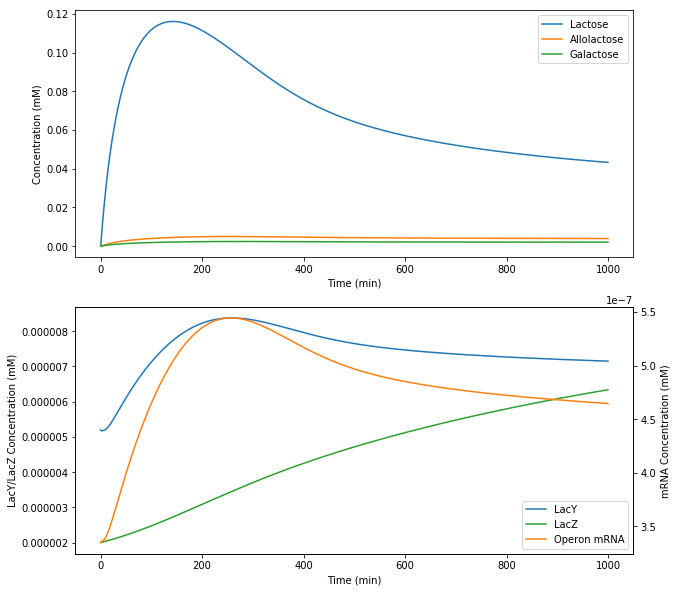

In [21]:
# Print end concentrations (may or may not be steady state)
print(("Lactose (mM)",L[-1]))
print(("Allolactose (mM)", A[-1]))
print(("Galactose (mM)", Ga[-1]))
print(("mRNA (mM)", mRNA[-1]))
print(("LacY (mM)", LacY[-1]))
print(("LacZ (mM)", LacZ[-1]))

# Plot metabolite concentrations
fig1 = plt.figure(figsize=(10,10))
ax1 = fig1.add_subplot(2,1,1)
ax1.plot(time, L)
ax1.plot(time, A)
ax1.plot(time, Ga)
ax1.set_xlabel("Time (min)")
ax1.set_ylabel("Concentration (mM)")
ax1.legend(["Lactose", "Allolactose",  "Galactose"])

# Plot enzyme concentrations
ax2 = fig1.add_subplot(2,1,2)
ax3 = ax2.twinx()
ln1 = ax2.plot(time, LacY, color = 'C0', label='LacY')
ln2 = ax2.plot(time, LacZ, color = 'C2', label='LacZ')
ln3 = ax3.plot(time, mRNA, color ='C1', label='Operon mRNA')
ax2.set_xlabel("Time (min)")
ax2.set_ylabel("LacY/LacZ Concentration (mM)")
ax3.set_ylabel("mRNA Concentration (mM)")

lns = ln1+ln2+ln3
labs = [l.get_label() for l in lns]
ax2.legend(lns, labs, loc=0)


## Further exploring the model

Now that we have a basic working model, we can use it to answer some questions about the system, and further improve its accuracy. Try to answer some of the following questions by modifying your code.

1. Set external lactose concentration to different levels: 0 mM, $8\times 10^{-3}$ mM, 0.8 mM, and run the simulation again. What happens?
    * This still assumes that the external lactose concentration is constant. How would you code an oscillation in external concentration? How would you expect the system to respond?
2. One common experimental approach to understand the effect of an enzyme is to knock it out. How would you represent the knockout of LacY or LacZ in this model? What about LacI?
3. Cells are constantly growing and multiplying. From a physical perspective, this can be thought of as continuous dilution of the current cell contents (why?). How would you account for this in the governing equations? (Hint: consider the effect of concentration on the degradation term in each equation and note the similarities and differences)
    * Implement the effect of dilution in the model. Run the model with the following initial conditions:
        * mRNA = $6.26\times 10^{-5}$ mM
        * LacY = $2\times 10^{-4}$ mM
        * LacZ = $5\times 10^{-5}$ mM
        * $L_e = 0.08 $ mM
4. In reality, LacY can work in both directions, transporting lactose into and out of the cell. How would this affect the behaviour of the model?
    * (After completing 3) Modify the differential equation for lactose and implement the additional term for export in your code. Use $K_{cat}$ = 2650 and $K_m$ = 1.81 for export. Why are these values biologically intuitive? (Hint: consider the corresponding values for lactose import)

First let's put the time loop and plotting routines into functions so we don't have to rewrite them for every question.

In [8]:
dt = 1
def run_simulation(L_ext, L, A, Gl, Ga, mRNA, LacZ, LacY):
    time = np.arange(0, len(L_ext)*dt, step=dt)
    for i in range(0, len(L_ext)-1):
        dmRNAdt = mRNA_rate(mRNA[-1], A[-1])
        dLacYdt = LacY_rate(LacY[-1], mRNA[-1])
        dLacZdt = LacZ_rate(LacZ[-1], mRNA[-1])

        dLdt = L_rate(L_ext[i], L[-1], A [-1], LacY[-1], LacZ[-1])
        dAdt = A_rate(L[-1], A[-1], LacZ[-1])
        dGadt = Ga_rate(L[-1], A[-1], Ga[-1], LacZ[-1])
        
        #print(dLdt)

        LacY.append(LacY[-1] + dLacYdt*dt)
        LacZ.append(LacZ[-1] + dLacZdt*dt)
        mRNA.append(mRNA[-1] + dmRNAdt*dt)

        L.append(L[-1] + dLdt*dt)
        A.append(A[-1] + dAdt*dt)
        Ga.append(Ga[-1] + dGadt*dt)
        Gl.append(Gl[-1] + dGadt*dt)
    return time

def plot_figures(time, L_ext, L, A, Ga, LAcY, LacZ, mRNA):
    # Plot metabolite concentrations
    fig1 = plt.figure(figsize=(10,10))
    ax1 = fig1.add_subplot(2,1,1)
    ax1.plot(time, L_ext)
    ax1.plot(time, L)
    ax1.plot(time, A)
    ax1.plot(time, Ga)
    ax1.set_xlabel("Time (min)")
    ax1.set_ylabel("Concentration (mM)")
    ax1.legend(["External Lactose", "Lactose", "Allolactose",  "Galactose"])

    # Plot enzyme concentrations
    ax2 = fig1.add_subplot(2,1,2)
    ax3 = ax2.twinx()
    ln1 = ax2.plot(time, LacY, color = 'C0', label='LacY')
    ln2 = ax2.plot(time, LacZ, color = 'C2', label='LacZ')
    ln3 = ax3.plot(time, mRNA, color ='C1', label='Operon mRNA')
    ax2.set_xlabel("Time (min)")
    ax2.set_ylabel("LacY/LacZ Concentration (mM)")
    ax3.set_ylabel("mRNA Concentration (mM)")

    lns = ln1+ln2+ln3
    labs = [l.get_label() for l in lns]
    ax2.legend(lns, labs, loc=0)

### Q1

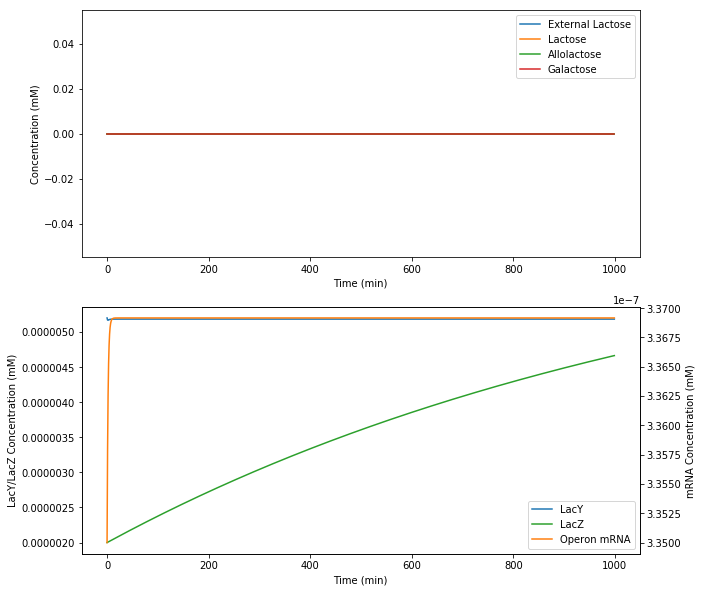

In [113]:
L_ext = 0*np.ones((1000,))
L = [0]
A = [0]
Gl = [0]
Ga = [0]

mRNA = [3.35e-7]
LacZ = [2e-6]
LacY = [5.2e-6]
time = run_simulation(L_ext, L, A, Gl, Ga, mRNA, LacZ, LacY)
plot_figures(time, L_ext, L, A, Ga, LacY, LacZ, mRNA)

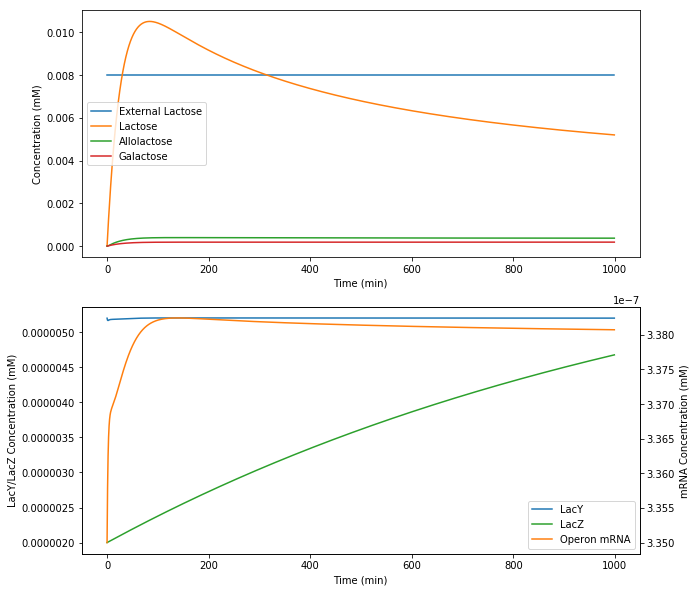

In [115]:
L_ext = 8e-3*np.ones((1000,))
L = [0]
A = [0]
Gl = [0]
Ga = [0]

mRNA = [3.35e-7]
LacZ = [2e-6]
LacY = [5.2e-6]
time = run_simulation(L_ext, L, A, Gl, Ga, mRNA, LacZ, LacY)
plot_figures(time, L_ext, L, A, Ga, LacY, LacZ, mRNA)

Note the different magnitude of peak internal lactose concentration, and the fact that LacY is virtually already at steady state.

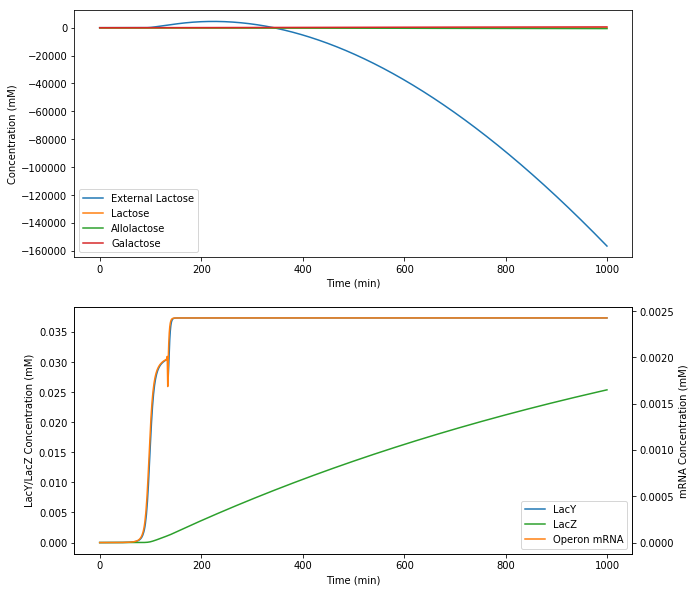

In [116]:
L_ext = 8e-1*np.ones((1000,))
L = [0]
A = [0]
Gl = [0]
Ga = [0]

mRNA = [3.35e-7]
LacZ = [2e-6]
LacY = [5.2e-6]
time = run_simulation(L_ext, L, A, Gl, Ga, mRNA, LacZ, LacY)

plot_figures(time,L_ext,L, A, Ga, LacY, LacZ, mRNA)

Note how internal lactose concentration becomes negative here. Clearly that doesn't make sense - the external lactose concentration is too high to be accurately modelled!

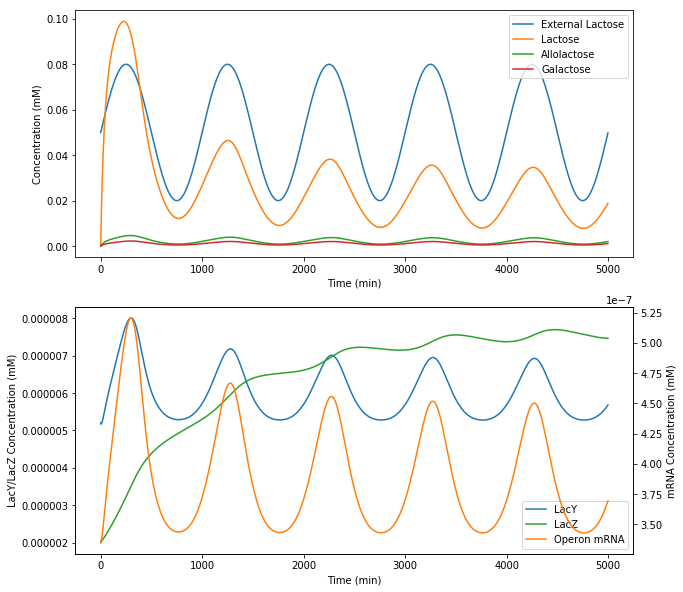

In [118]:
L_ext = np.sin(2*np.pi*1e-3*np.arange(0,5000,step=1))*0.03 + 0.05
L = [0]
A = [0]
Gl = [0]
Ga = [0]

mRNA = [3.35e-7]
LacZ = [2e-6]
LacY = [5.2e-6]
time = run_simulation(L_ext, L, A, Gl, Ga, mRNA, LacZ, LacY)

plot_figures(time, L_ext, L, A, Ga, LacY, LacZ, mRNA)

Note the phase difference between the internal and external LacZ concentrations.

## Q2

We can effectively remove LacY and LacZ from the system in several ways. We could assume their gene expression is zero, or that they are mutants with no catalytic activity($k_{cat}=0$). Let's do the first, starting with the LacY knockout.

We could also postulate variants of LacZ that have either transgalactosylation or hydrolysis activity but not both! Let's start with the LacY knockout.

In [11]:
# Chemical species involved (in mM)
L_ext = 8e-2*np.ones((1000,))
L = [0]
A = [0]
Gl = [0]
Ga = [0]

mRNA = [3.35e-7]
LacZ = [2e-6]
LacY = [0]

k_exp_lacz = 1.66e-2
k_deg_lacz = 8.33e-4

k_exp_lacy = 0
k_deg_lacy = 0.65

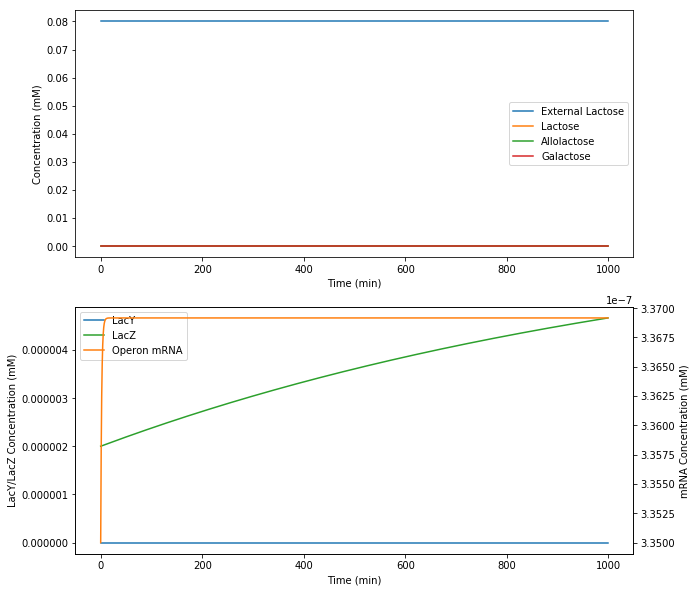

In [12]:
time = run_simulation(L_ext, L, A, Gl, Ga, mRNA, LacZ, LacY)

plot_figures(time, L_ext, L, A, Ga, LacY, LacZ, mRNA)

Since there is no method of lactose getting inside the cell, there is no change in any metabolite concentration. LacZ will continue to rise in concentration due to leaky expression until it reaches steady state with its degradation. In reality, there will be some evidence of regulation as lactose is also able to enter the cell through diffusion.

Next let's try knocking out LacZ:

In [17]:
# Chemical species involved (in mM)
L_ext = 8e-2*np.ones((1000,))
L = [0]
A = [0]
Gl = [0]
Ga = [0]

mRNA = [3.35e-7]
LacZ = [0]
LacY = [5.2e-6]

k_exp_lacz = 0
k_deg_lacz = 8.33e-4

k_exp_lacy = 10
k_deg_lacy = 0.65

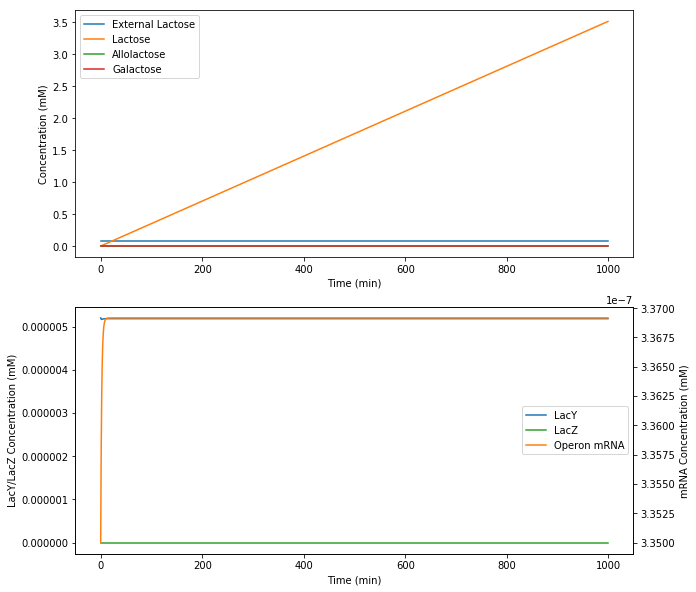

In [18]:
time = run_simulation(L_ext, L, A, Gl, Ga, mRNA, LacZ, LacY)

plot_figures(time, L_ext, L, A, Ga, LacY, LacZ, mRNA)

Here the leaky expression of LacY remains constant because there is no induction by allolactose. There is additionally no metabolism of lactose, so the lactose concentration simply increases linearly (external lactose concentration modelled as an infinite source).

## Q3 and Q4

See the document 'part2_full_lac_operon_model.ipynb'. Notice how the dynamics are much faster than in our simplified model, and what you'd expect biologically!

# Other applications of computing in biology

### Models of more complex systems can produce some stunning results. Below is a computational model of a genetic circuit that acts as an edge detector, that CUSBS built this year:

![Alt Text](https://media.giphy.com/media/3o752jta4KxeN7bvr2/giphy.gif)

### Statistical analysis such as hierarchical clustering can be performed on large datasets to uncover correlations between genes and specific genes to study further (D'haeseleer, Nat. Biotech. 2005). (__scipy.cluster__)

![alt-text](https://media.nature.com/lw926/nature-assets/nbt/journal/v23/n12/images/nbt1205-1499-F1.gif)

### DNA and amino acid sequences can be aligned across species to reveal evolutionary trends (Butt et al., Proc. Royal Soc. 2010). (__biopython__)

![](http://rspb.royalsocietypublishing.org/content/royprsb/277/1699/3381/F1.large.jpg?width=800&height=600&carousel=1)

### Machine learning can be used to predict functionality based on sequence information (Angermueller et al., Mol. Sys. Bio. 2016). (__pybrain__)

![](http://msb.embopress.org/content/msb/12/7/878/F2.large.jpg?width=800&height=600&carousel=1)

## Closing remarks

We've seen how a biological system can be described through a mathematical model, and how computers enable the practical study of these models through numerical solution of differential equations. Given parameters derived from experimentation, we've used such a model to investigate the dynamics of the <i>lac</i> operon in different situations. It's important to note that while models can be helpful, they are mathematical abstractions of systems that can be complex and stochastic in reality. Models are not always accurate, and can always be improved. We have made some improvements to the first model, but here are some ideas for more ambitious ones:

1. Include the modelling of the binding interaction between LacI and allolactose.
2. Account for competitive inhibition between allolactose and lactose.
3. Account for changes in cell growth rate due to metabolism of lactose and growth phase.
4. Add the catabolite repression mechanism for negative feedback.

Hopefully you've come away from these workshops with some basic Python skills and an appreciation of how computation and mathematics can be useful in biology. Beyond numerical modelling, there are myriad ways to leverage the power of computers in the lab, from bioinformatics to image analysis. Maybe you'll be using one of these in your next project!

## Part III Systems Biology

We hope you’ve enjoyed the workshops! If you’re interested to find out more about biological modelling and the use of computational techniques in biology generally, you may consider applying for the Part III Systems Biology course (4th year Natural Sciences Tripos). This course is a nice introduction to the variety of techniques and tools available for Systems Biology, which the course website defines as “an integrated approach to the study of living systems. It is quintessentially interdisciplinary with participation of biological, physical, mathematical, engineering and computational sciences.” Systems Biology is concerned with the relationships and interactions of the many different components of real biological systems which the highly reductionist approach of the past has tended to ignore. Notably one module focuses on the rapidly developing field of Synthetic Biology, the rational design of living systems.

The course has taught courses covering mathematical and computational, as well as biological topics and is open to students from variety of scientific or mathematics backgrounds.

Further information can be found here https://www.natsci.tripos.cam.ac.uk/subject-information/part3/sb and here https://www.sysbiol.cam.ac.uk/Part%20III. 

(Note applications for next academic year, i.e. for current 3rd year students, should be made by the first Friday in May)


Textbooks are also good options if you’d like to find out more, well reviewed examples are:

[A First Course in Systems Biology by Eberhard Voit](http://www.garlandscience.com/product/isbn/9780815344674)

[An Introduction Systems Biology – Design Principles of Biological Circuits by Uri Alon](http://www.weizmann.ac.il/mcb/UriAlon/introduction-systems-biology-design-principles-biological-circuits)

We recommend trying your college library before buying for yourself, typically libraries can buy new books on request if they don’t already have them.